<a href="https://colab.research.google.com/github/nsi319/Question-Answering/blob/main/question_answering_knowledge_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers==3.0.0
!pip install sentencepiece
!python -m nltk.downloader punkt

     |████████████████████████████████| 757kB 18.3MB/s 
     |████████████████████████████████| 1.2MB 54.8MB/s 
     |████████████████████████████████| 890kB 54.1MB/s 
     |████████████████████████████████| 3.0MB 53.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=e9104d1cdb8c6632bf8b5d2fda44be668463b7de4afe5eb13554381a8e2c970f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import os.path
from os import path

# if path.exists("/content/drive/MyDrive/Question")==False:
#   !git clone https://github.com/patil-suraj/question_generation.git /content/drive/MyDrive/Question

if path.exists("question_generation")==False:
  !git clone https://github.com/patil-suraj/question_generation.git
  
%cd /content/drive/MyDrive/querstion-answering

Cloning into 'question_generation'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 265 (delta 1), reused 2 (delta 0), pack-reused 259
Receiving objects: 100% (265/265), 298.28 KiB | 18.64 MiB/s, done.
Resolving deltas: 100% (141/141), done.
/content/drive/MyDrive/querstion-answering


**Sample Texts**

In [ ]:
text1 = "Naren and Anjaneya were playing football together. After that, they went to a restaurant to have dinner."

text2 = "Fidelity Investments is a privately-owned investment management company that was established in 1946 as a mutual fund company. Fidelity now offers a range of services including fund distribution and investment advice, wealth management, life insurance, retirement services, and securities execution and clearance. It manages equity, fixed income, and balanced mutual funds for individual investors, businesses, financial advisors, and institutional investors. \
Based in Boston, Massachusetts, it is one of the largest investment management firms in the United States, with over 26 million customers, $6.5 trillion in total customer assets, and more than $2.4 trillion in global assets under management.  \
The Fidelity Fund was established in 1930, a year after the stock market crash of 1929 and before the Great Depression of 1933. The fund continued to operate until 1943 when it was acquired by Boston-based lawyer Edward C. Johnson II. At the time, the fund reported assets under management valued at $3 million. In 1946, Johnson II founded the Fidelity Management and Research Company, now Fidelity Investments, to serve as an investment advisor to the Fidelity Fund. When running the fund, Johnson’s objective was to buy stocks with a potential for growth, and not necessarily blue-chip stocks. \
"

text3 = """On February 1, 2021, Judge Denise L. Cote of the U.S. District Court for the Southern District of New York entered a partial judgment against David Hu, the co-founder and chief investment officer of International Investment Group (IIG), a formerly registered investment adviser, enjoining Hu from violating the antifraud provisions of the federal securities laws. The Commission revoked IIG's registration in November 2019. According to the SEC's complaint, from October 2013, Hu orchestrated multiple frauds on IIG's investment advisory clients. As alleged, Hu grossly overvalued the assets in IIG's flagship hedge fund, resulting in the fund paying inflated fees to IIG, some of which went to Hu personally. In addition, through IIG, Hu allegedly sold at least $60 million in fake trade finance loans to other investors and used the proceeds to pay the redemption requests of earlier investors and other liabilities. The complaint alleges that Hu deceived IIG clients into purchasing the purported trade finance loans by directing others at IIG to create and provide to the clients fake loan documentation to substantiate the non-existent loans, including fake promissory notes and a forged credit agreement. The complaint, filed on July 17, 2020, charges Hu with violating Section 17(a) of the Securities Act of 1933, Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and Sections 206(1) and 206(2) of the Investment Advisers Act of 1940. Hu consented to a bifurcated settlement, agreeing to be permanently enjoined from violations of the charged provisions with monetary relief in an amount to be determined by the court at a later date upon motion of the Commission. The SEC previously charged IIG with fraud on November 21, 2019, and revoked IIG's registration as an investment adviser on November 26, 2019. On March 30, 2020, the SEC obtained a final judgment on consent enjoining IIG from violating the antifraud provisions of the federal securities laws and requiring IIG to pay more than $35 million in disgorgement and prejudgment interest. The SEC's ongoing investigation is being conducted by Philip A. Fortino, Lindsay Moilanen, Diego Brucculeri, and Sheldon L. Pollock of the New York Regional Office and Osman Nawaz of the Complex Financial Instruments Unit, with assistance from Eli Bass of the Division of Examinations. The litigation is being handled by Mr. Fortino and Ms. Moilanen. The matter is being supervised by Sanjay Wadhwa and Daniel Michael. The SEC appreciates the assistance of the U.S. Attorney's Office for the Southern District of New York and the Federal Bureau of Investigation."""

text4 = """The Securities and Exchange Commission today charged Arrayit Corporation, a Sunnyvale, California company, with making false and misleading statements about the development of a COVID-19 test, and with failing to file required financial reports. The SEC also charged Arrayit's co-founder and Chief Executive Officer, Rene Schena, with making misrepresentations to investors about the financial reports, and for her role as a control person of the company. The SEC's complaint alleges that, in March and April 2020, Arrayit falsely stated to investors that it had developed a COVID-19 blood test. In fact, as alleged, at the time, Arrayit had not yet purchased materials needed to make a test. The complaint further alleges that Arrayit falsely asserted to investors that it had submitted the test for emergency approval and that there was a high demand for the test. Additionally, the complaint alleges that, between October 2018 and March 2019, Arrayit issued a series of false and misleading statements to investors, including in a shareholder letter prepared by Rene Schena, claiming that it was preparing to file delinquent periodic reports and financial statements for the first time since November 2015. As alleged, Schena knew or was reckless in not knowing that these claims were untrue. The SEC's complaint, filed in the U.S. District Court for the Northern District of California, charges Arrayit with violating the antifraud provisions of Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and the reporting provisions of Section 13(a) of the Exchange Act and Rules 13a-1 and 13a-13 thereunder. The complaint further charges Rene Schena with aiding and abetting Arrayit's violations and alleges that she is liable as a control person of Arrayit pursuant to Section 20(a) of the Exchange Act. Without admitting or denying the allegations in the complaint, Arrayit and Rene Schena agreed to settle with the Commission and to be enjoined from future violations of the charged provisions. Rene Schena also agreed to a 3-year officer and director bar and to pay a $50,000 penalty. The settlements are subject to court approval. The Commission previously filed charges against Mark Schena, the President and Chief Science Officer of Arrayit, for related conduct. That matter is currently pending in the U.S. District Court for the Northern District of California. The SEC's investigation was conducted by Fitzann R. Reid and John K. Han, and supervised by Jason H. Lee and Monique C. Winkler, of the San Francisco Regional Office."""

text5 = """We open with J. Daniel Atlas (Jesse Eisenberg) demonstrating a card trick to us, as he explains, "Come in close. Closer. Because the more you think you see, the easier it will be to fool you. Because what is seeing. You're looking but what you're really doing is filtering, interpreting, searching for meaning. My job: to take that most precious of gifts you give me - your attention - and use it against you." Chicago, Monday: Daniel is a street performer in Chicago. He is shown doing a card trick to an attractive young girl. The seemingly typical card tricks climax in the side of the John Hancock Center somehow reflecting his card. The performance is being watched by a mysterious hooded man whose face is never seen. Afterwards, the attractive girl, who turns out to be a big fan of Daniel, charms him into taking her to his apartment for sex. Before they can begin, though, he is distracted by the discovery of a "Lovers" tarot card. On one side of the card is the text "March 29th; 4:44 PM, 45 East Evan Street, NY, NY." New Orleans, Tuesday: At a restaurant, we meet Merritt McKinney (Woody Harrelson), a street mentalist and hypnotist. He demonstrates his act on a married couple. First, he hypnotizes the wife so she can't speak or move, while he gets under the brain of husband, and through his mind reading exposes the man as an adulterer who is sleeping with his wife's sister. Merritt then fleeces the man out of $250 before hypnotizing them into "forgetting" the matter. While he's packing up his posters, he finds a "Hermit" tarot card. New York, Wednesday: On a New York City ferry boat, we meet Jack Wilder (Dave Franco), a street con artist and magician who lures in customers by betting them money if they can figure out how he bends a spoon with his mind. One correctly guesses it, and Wilder successfully pays him, only to pickpocket the guesser's wallet. He then flees, bumping into the mystery hooded man, who slips a "Death" tarot card into Wilder's coat pocket. Los Angeles, Thursday: At a theatre downtown, Henley Reeves (Isla Fisher) is a trained stage performer. She finishes off her act with a water tank escape act in which she seemingly is eaten alive by flesh-eating piranhas, only to emerge alive and well in the middle of the crowd seconds after the water turns a bloody red. As she packs up her supplies, she finds a "High Priestess" tarot card floating in the tank. The four street performers each travel to New York City, arriving at a rundown apartment on the Lower East Side. Daniel and Henley are surprised when they see each other, as Henley is Daniel's former personal assistant, and Merritt is able to mind-read that they used to date. While Merritt and Henley complain about Daniel's controlling personality, Jack arrives date and introduces himself as Daniel's fan. He is able to pick the lock of the apartment they have been invited to, but no one is inside. Instead they discover the blueprints of some amazing machinery that they know could help propel them to stardom. Las Vegas, One Year Later: One year later, the four magicians have declared themselves an official troupe known as "The Four Horsemen" and are now sponsored by insurance magnate Arthur Tressler (Michael Caine). They are performing onstage at the MGM Grand in Las Vegas. For their final trick, they declare that they are going to do something that has never been done before on any magic stage: they are going to rob a bank. The crowd is very enthusiastic, and there are a large number of volunteers who seem to have a vendetta, so Daniel declares that they are going to select a volunteer at random. Merritt, Henley and Wilder go around with bowls of ping pong balls to allow the audience to make the selection. Wilder tosses Daniel a ping pong ball with a letter B, which tells them which section to choose a volunteer from. Merritt then tosses a '5' ball, to give them a row to choose from, and lastly, Henley tosses a '13' ball, and the man seated in seat B513, a Frenchman named Etienne Forcier (Jose Garcia), stands up. Etienne says on the mike that his bank is the Credit Republican de Paris. While Etienne is making his way to the stage, Daniel takes the time to point Tressler out in the crowd and express the Horsemen's gratitude towards him for sponsoring them. On stage, Etienne is briefed by Merritt, while Wilder fits him out with a teleportation helmet. Daniel then hands Etienne a set of playing cards, and has him pick a card at random. He then has Etienne sign his name in English on the card he chose (a red two of hearts). The troupe now conjures a teleporter in the middle of the stage. They have Etienne climb onto the platform. Merritt reminds Etienne that it's 11:50 PM now in Las Vegas and 8:50 AM in Paris, so his bank will be opening in about ten minutes. They then activate the teleporter, and Etienne seemingly is successfully teleported off the stage. In Paris, at the exact same moment, to be precise, Etienne stands up in the vault of his bank. Video cameras built into the helmet and a microphone allow him to communicate with the Las Vegas stage. He sees a big pile of money in the middle of the room, approximately three million euros worth. Daniel instructs Etienne to put the card he just signed on the floor in the middle of the money pile, along with his ticket stub from the performance. He then tells Etienne to push a button on the side of his helmet. The button activates an air duct that vacuums up the entire pile of money. Moments later, bank employees arriving for work at that bank open the vault and discover the safe is indeed empty, with only the card and ticket stub on the floor. Meanwhile, their money is being showered on the Las Vegas crowd. FBI agent Dylan Rhodes (Mark Ruffalo) is called to investigate the theft and is partnered with Interpol Agent Alma Dray (Mélanie Laurent). Alma has already deemed interrogation useless, but Dylan decides to do the interviews himself. Etienne insists on his innocence and sincerely believes he was transported to France, but it is soon discovered he had been hypnotized, after Etienne suddenly acts like he's in a philharmonic orchestra upon hearing Dylan say the word "Bullshit". They interrogate the Four Horsemen next, Jack is at ease enough to sleep, while a bored Henley "magically" makes her opposite chair spin. Merritt turns the interview against them, pointing out the secrets that Alma is hiding and how Dylan has abandonment issues, likely because of his father (important later in the film). Daniel's interview creates the most tension, as he taunts Dylan with the fact that the police have no proof and that the Four Horsemen will always be ahead. Unable to arrest them when the only explanation they have for the theft is "magic", the police are forced to release their suspects. While Dylan stews over this, an officer runs up to him and eagerly tells him that one of the audience members was Thaddeus Bradley (Morgan Freeman)--an ex-magician who makes money by revealing the secrets behind other magicians' tricks, Thaddeus had actually recorded the show and figured out how the heist was done. He takes the police back to the stage, where he puts Dylan through the volunteer audience member's position and explains how the man was "transported" to Paris. The Four Horsemen stole the money weeks before, and manipulated the audience into believing it happened in real time. The "French" bank vault to which Etienne was apparently transported was a duplicate beneath the stage: he merely dropped through a trapdoor. And Etienne himself was not chosen at random: the magicians had palmed ping pong balls with his seat number which they exchanged for the ones picked from the bowls. This was only the start, as Thaddeus knew there was more coming and warns Dylan to be prepared for the magicians' next performance in New Orleans. Dylan asks Thaddeus to help the police arrest the four, but Thaddeus refuses and leaves. As Thaddeus prepares for his next video, Arthur Tressler approaches and tries to bribe him into staying out of the Four Horsemen's rise to fame. Again Thaddeus refuses, and Arthur threatens to bring the ex-magician to ruin. Arthur's demonstration of the threat however has Thaddeus warning him instead to be careful as it may be Arthur who will be ruined. The press is soon reporting the sold out show for the Four Horsemen's debut in New Orleans. Perhaps made aware of Thaddeus's presence, the magicians demonstrate the secret of the common disappearing rabbit trick. They then move to original stunts, including soap bubbles strong enough to send Henley flying through the air and Merritt hypnotizing twelve ordinary people to believe they are football players ready to tackle the quarterback upon hearing the command "freeze". For the finale they invite Arthur on stage and empty his bank account, distributing it to the audience that comprises people whose insurance claims had been denied or reduced by his company. The excited yells from audience members receiving alerts from their banks about the deposit draws chaos. Arthur tries to go after the magicians, only to find himself chained to the stage. Dylan runs up the stage to arrest the Four Horsemen and shouts "freeze."--they then escape with help from the hypnotized "football player" audience members. The police chase the magicians through the streets but are ultimately tricked. Only Alma comes close as she manages to corner Daniel with her gun, but seeing him unarmed and frightened causes her to hesitate, allowing Daniel to escape. Although Dylan blames her for letting Daniel go, Dylan knows Alma was probably the only person not fooled by the Four Horsemen into running in the wrong direction. Finally more receptive to her opinions, Alma tells him about the rumors of a magicians' secret society called "The Eye". They were a group of magicians similar to Robin Hood; stealing from the rich, giving to the poor, often dependent on illusions and great leaps of faith or even blind obedience. Dylan is skeptical, but then Alma starts drawing comparisons to a particular magician, one who Thaddeus exposed. That man was so humiliated he attempted a complex underwater stunt that went awry, yet a body was never found. The heists might have been a mere distraction in the bigger picture, something that Thaddeus understands when an infuriated Tressler speaks to him. Arthur hires Thaddeus to expose and humiliate the Four Horsemen in their next performance. Things are tense before the Four Horsemen's last performance in New York City. They are still following instructions from their mysterious benefactor, but worried that after everything is accomplished their benefactor will abandon them to the police. As the youngest, Jack is most panicked and the others order him to follow the plan. The police arrive and surround the building--Jack is left alone to destroy all remaining evidence, but Dylan and his partner discover his hideout. What evidence he couldn't burn Jack grabs and tries to flee, but Dylan and his partner are in hot pursuit. The magician attempts to escape in a stolen car, and the car chase is broadcast live before Jack loses control of the vehicle. When the car flips and skids to a halt Dylan tries to get him out, but can only take the evidence before the car explodes in flames. The remaining three of the Four Horsemen post an online video mourning Jack's loss but resolve to continue their final act in New York. From the papers Jack had tried to destroy, Dylan and Alma learn that the Four Horsemen are targeting a particular safe which is under the surveillance of another FBI team. Alma has no jurisdiction, and with the Four Horsemen's consistent ability to outwit Dylan, another FBI team leader takes over the case. The team rush to where the safe is stored, only to find the room empty. As it turns out, another FBI agent had been hypnotized to give instructions for the safe to be transported. The team escort the safe to the destination, only to meet up with Thaddeus. Thaddeus tells them to check the safe. Inside the safe they find only balloons, the Four Horsemen have outsmarted them again. By now, Dylan is convinced there is a fifth member of the team, potentially Alma or Thaddeus. "5 Pointz" is where the final performance is to be held. Dylan once again attempt to arrest the Four Horsemen but the three escape by using holograms, dummies, and even jumping off a rooftop. Money again rains from the sky into the cheering crowd, but it turns out the money is fake. Knowing that the story of the Four Horsemen is now over, Dylan resigns himself to let it go and explore his feelings for Alma instead. Meanwhile, Thaddeus returns to his car, only to discover it is filled with the real money from the stolen safe. The FBI show up and arrest Thaddeus for being part of the plan. In prison, Thaddeus tells Dylan that he was framed. He explains how the Four Horsemen performed the safe heist through the use of mirrors and then faking Jack's death with a duplicate "standard issue" FBI car, but can't figure out how they managed to set everything up by themselves. He realizes then that there was a fifth horsemen and it was not him or Alma but Dylan. Dylan was the mastermind of the entire plot, though Thaddeus is unable to determine why. Dylan tells Thaddeus he wants him imprisoned in the bars forever, trying to figure out why. He leaves to reunite with the Four Horsemen, who are stunned to learn that he is the mysterious benefactor who brought them together. He initiates them into "The Eye". Back in France, Alma finds an old newspaper article slipped in her current paper. The article is about the magician who attempted the underwater trick and drowned, leaving his family penniless. Dylan appears and confesses that he is the son of the drowned magician. He designed the Horsemen plot to obtain revenge on those involved: Thaddeus, for humiliating his father; the bank in Paris and Tressler's company, which refused to pay insurance on his father's death; and the safe-producing company that produced the safe used in his father's trick and the Horsemen's final act. The company may have made good bank safes, but for the safe Dylan's father used they used an inferior quality of metal, causing it to warp and contributing to his death. Dylan was living in poverty until The Eye recruited him. He admits that he had planned everything, but did not plan on meeting and falling in love with Alma. Although she briefly considers turning Dylan in, ultimately she chooses not to."""

**Import pipeline**

In [ ]:
from pipelines import pipeline

**Generating Functions**

In [ ]:
def generate_qa_pairs(model,text):
  print("Text: ")
  print(text)
  print("\n")
  try:
    question_answer = model(text)
    if len(question_answer)==0:
      print("No question-answer pair generated :(")

    i = 1
    for qa in question_answer:
      print("Q{}) {} ".format(i,qa['question']))
      print("Answer: {} ".format(qa['answer']))
      i+=1
      print("\n")
  except:
    print("No question-answer pair generated :(")

def generate_answer(model,question,context):
  print("Context:")
  print(context)
  print("\n")

  print("Q: {}".format(question))
  try:
    answer = model({"question": question, "context": context})
    print("A: {}".format(answer))
  except:
    print("No answer generated :(")

def generate_answers_for_questions(model,questions,context):
  print("Context:")
  print(context)
  print("\n")
  for question in questions:
    print("Q: {}".format(question))
    try:
      answer = model({"question": question, "context": context})
      print("A: {}".format(answer))
    except:
      print("No answer generated :(")
    print("\n")

def generate_question(model,text):
  print("Text: ")
  print(text)
  print("\n")
  try:
    question = model(text)
    i = 1
    if len(question)==0:
      print("No questions generated :(")

    for qa in question:
      print("Q{}) {} ".format(i,qa))
      i+=1
      print("\n")
  except:
    print("No questions generated :(")


**GENERATE QUESTION-ANSWER PAIRS FROM TEXT**

In [ ]:
from pipelines import pipeline

#default model will be t5-small
nlp = pipeline("question-generation", "valhalla/t5-base-qg-hl")

In [ ]:
generate_qa_pairs(nlp,text4)

**MULTITASK (both QUESTION-ANSWER PAIR and QUESTION-GENERATION)**

In [ ]:
from pipelines import pipeline
nlp_qa_qg = pipeline("multitask-qa-qg")

In [ ]:
generate_qa_pairs(nlp_qa_qg,text4)

Text: 
The Securities and Exchange Commission today charged Arrayit Corporation, a Sunnyvale, California company, with making false and misleading statements about the development of a COVID-19 test, and with failing to file required financial reports. The SEC also charged Arrayit's co-founder and Chief Executive Officer, Rene Schena, with making misrepresentations to investors about the financial reports, and for her role as a control person of the company. The SEC's complaint alleges that, in March and April 2020, Arrayit falsely stated to investors that it had developed a COVID-19 blood test. In fact, as alleged, at the time, Arrayit had not yet purchased materials needed to make a test. The complaint further alleges that Arrayit falsely asserted to investors that it had submitted the test for emergency approval and that there was a high demand for the test. Additionally, the complaint alleges that, between October 2018 and March 2019, Arrayit issued a series of false and misleading

In [ ]:
generate_answer(nlp_qa_qg,"Who is the CIO of IIG?",text3)

Context:
On February 1, 2021, Judge Denise L. Cote of the U.S. District Court for the Southern District of New York entered a partial judgment against David Hu, the co-founder and chief investment officer of International Investment Group (IIG), a formerly registered investment adviser, enjoining Hu from violating the antifraud provisions of the federal securities laws. The Commission revoked IIG's registration in November 2019.
According to the SEC's complaint, from October 2013, Hu orchestrated multiple frauds on IIG's investment advisory clients. As alleged, Hu grossly overvalued the assets in IIG's flagship hedge fund, resulting in the fund paying inflated fees to IIG, some of which went to Hu personally.  In addition, through IIG, Hu allegedly sold at least $60 million in fake trade finance loans to other investors and used the proceeds to pay the redemption requests of earlier investors and other liabilities. The complaint alleges that Hu deceived IIG clients into purchasing the 

**GENERATING QUESTIONS FROM TEXT**

In [ ]:
from pipelines import pipeline
nlp_qg = pipeline("e2e-qg")

In [ ]:
generate_question(nlp_qg,text4)

Text: 
The Securities and Exchange Commission today charged Arrayit Corporation, a Sunnyvale, California company, with making false and misleading statements about the development of a COVID-19 test, and with failing to file required financial reports. The SEC also charged Arrayit's co-founder and Chief Executive Officer, Rene Schena, with making misrepresentations to investors about the financial reports, and for her role as a control person of the company. The SEC's complaint alleges that, in March and April 2020, Arrayit falsely stated to investors that it had developed a COVID-19 blood test. In fact, as alleged, at the time, Arrayit had not yet purchased materials needed to make a test. The complaint further alleges that Arrayit falsely asserted to investors that it had submitted the test for emergency approval and that there was a high demand for the test. Additionally, the complaint alleges that, between October 2018 and March 2019, Arrayit issued a series of false and misleading

In [ ]:
# Trying to fetch answers for the above questions

questions = [
"Who was the co-founder and Chief Executive Officer of ArrayIT?",
"What did the SEC complaint allege?",
"When did Arrayit issue false statements to their investors?",
"What were the charges made by SEC complaint on Arrayit?",
"What did the complaint charge Rene Schena with?",
"How much penalty did Rene Schena pay?",
"Who conducted the investigation?"
]
context = text4.replace(",","")

generate_answers_for_questions(model=nlp_qa_qg,questions=questions,context=context)




Context:
The Securities and Exchange Commission today charged Arrayit Corporation a Sunnyvale California company with making false and misleading statements about the development of a COVID-19 test and with failing to file required financial reports. The SEC also charged Arrayit's co-founder and Chief Executive Officer Rene Schena with making misrepresentations to investors about the financial reports and for her role as a control person of the company. The SEC's complaint alleges that in March and April 2020 Arrayit falsely stated to investors that it had developed a COVID-19 blood test. In fact as alleged at the time Arrayit had not yet purchased materials needed to make a test. The complaint further alleges that Arrayit falsely asserted to investors that it had submitted the test for emergency approval and that there was a high demand for the test. Additionally the complaint alleges that between October 2018 and March 2019 Arrayit issued a series of false and misleading statements t

General Questions, Knowledge Graph (Test)

In [ ]:
print(text4)
print(text3)

The Securities and Exchange Commission today charged Arrayit Corporation, a Sunnyvale, California company, with making false and misleading statements about the development of a COVID-19 test, and with failing to file required financial reports. The SEC also charged Arrayit's co-founder and Chief Executive Officer, Rene Schena, with making misrepresentations to investors about the financial reports, and for her role as a control person of the company. The SEC's complaint alleges that, in March and April 2020, Arrayit falsely stated to investors that it had developed a COVID-19 blood test. In fact, as alleged, at the time, Arrayit had not yet purchased materials needed to make a test. The complaint further alleges that Arrayit falsely asserted to investors that it had submitted the test for emergency approval and that there was a high demand for the test. Additionally, the complaint alleges that, between October 2018 and March 2019, Arrayit issued a series of false and misleading statem

In [4]:
def generate_qa_pairs(model,text):
  print("Text: ")
  print(text)
  print("\n")
  try:
    question_answer = model(text)
    if len(question_answer)==0:
      print("No question-answer pair generated :(")

    i = 1
    for qa in question_answer:
      print("Q{}) {} ".format(i,qa['question']))
      print("Answer: {} ".format(qa['answer']))
      i+=1
      print("\n")
  except:
    print("No question-answer pair generated :(")

def generate_answer(model,question,context):
  print("Context:")
  print(context)
  print("\n")

  print("Q: {}".format(question))
  try:
    answer = model({"question": question, "context": context})
    print("A: {}".format(answer))
  except:
    print("No answer generated :(")

def generate_answers_for_questions(model,questions,context):
  print("Context:")
  print(context)
  print("\n")
  answers = []
  for question in questions:
    print("Q: {}".format(question))
    try:
      answer = model({"question": question, "context": context})
      print("A: {}".format(answer))
      answers.append(answer)
    except:
      print("No answer generated :(")
      answers.append("NA")
    print("\n")
  return answers

def generate_question(model,text):
  print("Text: ")
  print(text)
  print("\n")
  try:
    question = model(text)
    i = 1
    if len(question)==0:
      print("No questions generated :(")

    for qa in question:
      print("Q{}) {} ".format(i,qa))
      i+=1
      print("\n")
  except:
    print("No questions generated :(")


In [97]:
from pipelines import pipeline
nlp_qa_qg = pipeline("multitask-qa-qg")

releases = [
            """The Securities and Exchange Commission today charged Arrayit Corporation, a Sunnyvale, California company, with making false and misleading statements about the development of a COVID-19 test, and with failing to file required financial reports. The SEC also charged Arrayit's co-founder and Chief Executive Officer, Rene Schena, with making misrepresentations to investors about the financial reports, and for her role as a control person of the company. The SEC's complaint alleges that, in March and April 2020, Arrayit falsely stated to investors that it had developed a COVID-19 blood test. In fact, as alleged, at the time, Arrayit had not yet purchased materials needed to make a test. The complaint further alleges that Arrayit falsely asserted to investors that it had submitted the test for emergency approval and that there was a high demand for the test. Additionally, the complaint alleges that, between October 2018 and March 2019, Arrayit issued a series of false and misleading statements to investors, including in a shareholder letter prepared by Rene Schena, claiming that it was preparing to file delinquent periodic reports and financial statements for the first time since November 2015. As alleged, Schena knew or was reckless in not knowing that these claims were untrue. The SEC's complaint, filed in the U.S. District Court for the Northern District of California, charges Arrayit with violating the antifraud provisions of Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and the reporting provisions of Section 13(a) of the Exchange Act and Rules 13a-1 and 13a-13 thereunder. The complaint further charges Rene Schena with aiding and abetting Arrayit's violations and alleges that she is liable as a control person of Arrayit pursuant to Section 20(a) of the Exchange Act. Without admitting or denying the allegations in the complaint, Arrayit and Rene Schena agreed to settle with the Commission and to be enjoined from future violations of the charged provisions. Rene Schena also agreed to a 3-year officer and director bar and to pay a $50,000 penalty. The settlements are subject to court approval. The Commission previously filed charges against Mark Schena, the President and Chief Science Officer of Arrayit, for related conduct. That matter is currently pending in the U.S. District Court for the Northern District of California. The SEC's investigation was conducted by Fitzann R. Reid and John K. Han, and supervised by Jason H. Lee and Monique C. Winkler, of the San Francisco Regional Office.""",
            """On February 1, 2021, Judge Denise L. Cote of the U.S. District Court for the Southern District of New York entered a partial judgment against David Hu, the co-founder and chief investment officer of International Investment Group (IIG), a formerly registered investment adviser, enjoining Hu from violating the antifraud provisions of the federal securities laws. The Commission revoked IIG's registration in November 2019. According to the SEC's complaint, from October 2013, Hu orchestrated multiple frauds on IIG's investment advisory clients. As alleged, Hu grossly overvalued the assets in IIG's flagship hedge fund, resulting in the fund paying inflated fees to IIG, some of which went to Hu personally. In addition, through IIG, Hu allegedly sold at least $60 million in fake trade finance loans to other investors and used the proceeds to pay the redemption requests of earlier investors and other liabilities. The complaint alleges that Hu deceived IIG clients into purchasing the purported trade finance loans by directing others at IIG to create and provide to the clients fake loan documentation to substantiate the non-existent loans, including fake promissory notes and a forged credit agreement. The complaint, filed on July 17, 2020, charges Hu with violating Section 17(a) of the Securities Act of 1933, Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and Sections 206(1) and 206(2) of the Investment Advisers Act of 1940. Hu consented to a bifurcated settlement, agreeing to be permanently enjoined from violations of the charged provisions with monetary relief in an amount to be determined by the court at a later date upon motion of the Commission. The SEC previously charged IIG with fraud on November 21, 2019, and revoked IIG's registration as an investment adviser on November 26, 2019. On March 30, 2020, the SEC obtained a final judgment on consent enjoining IIG from violating the antifraud provisions of the federal securities laws and requiring IIG to pay more than $35 million in disgorgement and prejudgment interest. The SEC's ongoing investigation is being conducted by Philip A. Fortino, Lindsay Moilanen, Diego Brucculeri, and Sheldon L. Pollock of the New York Regional Office and Osman Nawaz of the Complex Financial Instruments Unit, with assistance from Eli Bass of the Division of Examinations. The litigation is being handled by Mr. Fortino and Ms. Moilanen. The matter is being supervised by Sanjay Wadhwa and Daniel Michael. The SEC appreciates the assistance of the U.S. Attorney's Office for the Southern District of New York and the Federal Bureau of Investigation.""",
            """The Securities and Exchange Commission yesterday charged New Jersey insurance agent Ivan Ramos with fraud in connection with two securities offerings that raised over $1 million from his insurance clients and other investors. According to the SEC's complaint, from approximately August 2017 to July 2020, Ramos, an insurance agent at a large, well-known insurance company, lured several of his clients and other acquaintances into investing approximately $1 million through a pair of firms, Invexperts, LLC and Wealth Seeds Capital, LLC. The complaint alleges that Ramos falsely promised investors in Invexperts - a company wholly owned by a friend of Ramos's - a conservative, safe investment, with a guaranteed 5% return. The complaint further alleges that the investors from whom Ramos solicited funds were inexperienced and put their trust in Ramos as an agent of the well-known insurance company. As alleged, however, Ramos actually intended to use funds he solicited for Invexperts to finance a restaurant venture that he knew involved significant risk, and in fact used investors' funds to operate the restaurant, purchase real estate, and pay his personal expenses. The complaint alleges that when the restaurant failed to turn a profit, Ramos created and solicited investments in Wealth Seeds. According to the complaint, Ramos falsely pitched Wealth Seeds as a safe investment, but used funds invested in Wealth Seeds to repay Invexperts investors. The SEC's complaint, filed in federal district court for the District of New Jersey, charges Ramos with violating the antifraud provisions of Section 17(a) of the Securities Act of 1933 and Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder. Ramos has consented to the entry of a judgment that imposes a permanent injunction, with monetary relief to be determined at a later date. The settlement is subject to court approval. In a parallel action concerning the same conduct, the U.S. Attorney's Office for the District of New Jersey today announced that Ramos pleaded guilty. The SEC's investigation, which is ongoing, is being conducted by Liora Sukhatme and Adam Grace of the New York Regional Office and supervised by Lara S. Mehraban. The SEC's litigation is being handled by Ms. Sukhatme and Jack Kaufman. The SEC appreciates the assistance of the U.S. Attorney's Office for the District of New Jersey and the Federal Bureau of Investigation.""",
            """The Securities and Exchange Commission charged former Minneapolis-area investment adviser Isaiah L. Goodman for allegedly defrauding his advisory clients out of approximately $2.25 million. According to the SEC's complaint, from at least September 2018 to November 2020, Goodman, doing business through Becoming Financial Advisory Services, LLC, stole more than $2.25 million from at least 20 advisory clients. As alleged, Goodman falsely represented to these clients that he would invest their money in securities, including mutual funds and stocks for their retirement and investment accounts. Instead, Goodman allegedly misappropriated their money by using it for his own personal and business expenses, including home renovation and building expenses, car payments, and vacations. Goodman allegedly furthered the fraud by providing his clients with fake account statements and computer screenshots purporting to show that their funds were appropriately invested and their accounts had appreciated in value, and by making Ponzi-like payments to certain clients. The SEC's complaint, filed in federal district court in Minnesota, charges Goodman with violating the antifraud provisions of Section 17(a) of the Securities Act of 1933, Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and Sections 206(1) and 206(2) of the Investment Advisers Act of 1940, and seeks injunctive relief, disgorgement with pre-judgment interest, and civil penalties. The U.S. Attorney's Office for the District of Minnesota filed criminal charges against Goodman on February 8, 2021 in a parallel action. The SEC's investigation was conducted by Devlin N. Su, and supervised by Amy Flaherty Hartman in the Chicago Regional Office. The SEC's litigation is being led by Timothy Stockwell. The SEC appreciates the assistance of the U.S. Attorney's Office for the District of Minnesota and the Minnesota Department of Commerce.""",
            """The Securities and Exchange Commission charged Stephen Scott Moleski (a/k/a Steve Scott) and David Michael with fraud in connection with an investment adviser and private fund enterprise they operated. The SEC also charged Moleski, Michael, and their agent, Erik Christian Jones, with engaging in unregistered offerings of securities and acting as unregistered brokers. According to the SEC's complaint, during 2018 and 2019, Moleski, Michael, and Jones solicited investors to purchase securities offered by a pair of unaffiliated companies. As alleged, approximately 30% of the funds raised from investors in connection with these two securities offerings were paid, directly or indirectly, to the defendants as commissions. The complaint alleges that none of the defendants were registered as broker-dealers or affiliated with registered broker-dealers at the time. The complaint also alleges that Moleski and Michael, operating through various business entities, acted as investment advisers in connection with three private investment funds that they and their agents, such as Jones, offered and sold to investors beginning in 2019. Moleski and Michael, the complaint alleges, misled investors into believing that the monies investors entrusted to Moleski and Michael would be invested in one or more securities. According to the complaint, however, very little of the money was invested; the complaint alleges that Moleski and Michael instead misappropriated the money and used it to pay personal and business expenses, including sales commissions to agents such as Jones. The SEC's complaint, filed in the U.S. District Court for the Central District of California, charges Moleski and Michael with violating the antifraud provisions of Section 17(a) of the Securities Act of 1933; Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder; and Sections 206(1), 206(2), and 206(4) of the Investment Advisers Act of 1940 and 206(4)-8 thereunder, and also charges Moleski, Michael, and Jones with violating the registration provisions of Sections 5(a) and 5(c) of the Securities Act and the broker-dealer registration provisions of Section 15(a)(1) of the Securities Exchange Act. The complaint also names certain business entities associated with Moleski and/or Michael as relief defendants. The SEC seeks injunctions, disgorgement plus prejudgment interest, and civil penalties against the defendants, and disgorgement plus prejudgment interest from the named relief defendants. The SEC's investigation was conducted by James Thibodeau and was supervised by Amy Oliver. The litigation will be led by Casey Fronk. The SEC encourages investors to check the background of anyone selling or offering them an investment using the free and simple search tool on Investor.gov.""",
            """On February 5, 2021, the Securities and Exchange Commission charged Oregon resident Mark Ahn with insider trading in the securities of Massachusetts-based pharmaceutical company Dimension Therapeutics, Inc. in advance of an August 2017 merger announcement. The SEC's complaint, filed in federal district court in Massachusetts, charges Ahn with violating the antifraud provisions of Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder. The SEC seeks penalties, injunctive relief, and an order barring Ahn from serving as an officer or director of any SEC-reporting company. In a parallel action, the U.S. Attorney's Office for the District of Massachusetts announced criminal charges against Ahn. The SEC's case is being handled by Asita Obeyesekere, Nita Klunder, Xinyue Angela Lin, Sofia Hussain, Al Day, and Paul G. Block of the Boston Regional Office. The SEC appreciates the assistance of the U.S. Attorney's Office for the District of Massachusetts, the Federal Bureau of Investigation, and the Financial Industry Regulatory Authority.""",
            """The Securities and Exchange Commission today charged three individuals with defrauding hundreds of retail investors out of more than $11 million through two fraudulent and unregistered digital asset securities offerings. According to the SEC's complaint, filed in U.S. District Court for the Eastern District of New York, from approximately December 2017 through May 2018, Kristijan Krstic, founder of Start Options and Bitcoiin2Gen, and John DeMarr, the primary U.S.-based promoter for these companies, fraudulently induced investors to buy digital asset securities. The SEC alleges that, from approximately December 2017 through late January 2018, Krstic and DeMarr touted Start Options' purported digital asset mining and trading platform. According to the complaint, they falsely claimed Start Options was "the largest Bitcoin exchange in euro volume and liquidity" and "consistently rated the best and most secure Bitcoin exchange by independent news media." The SEC also alleges that, starting in January 2018, Krstic and DeMarr promoted Bitcoiin2Gen's unregistered initial coin offering (ICO) of digital asset securities known as B2G tokens. According to the complaint, another individual, Robin Enos, working with DeMarr, drafted fraudulent promotional materials that Enos knew would be disseminated to the investing public. These materials allegedly contained numerous false statements, including that the B2G tokens would be deliverable on the Ethereum blockchain, that the invested funds would be used to develop a coin that was "mineable," and that the tokens would be tradeable on a proprietary digital asset trading platform at the platform's "launch" in early April 2018. In reality, the complaint alleges, these claims about the B2G tokens were false, Bitcoiin2Gen was a sham, and Krstic and DeMarr allegedly misappropriated millions of dollars of investor funds for their own personal benefit. The SEC's complaint charges Krstic and Demarr with violating the registration provisions of Sections 5(a) and 5(c) of the Securities Act of 1933 and the antifraud provisions of Section 17(a) of the Securities Act of 1933 and Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and Enos with aiding and abetting the antifraud violations listed above. The complaint seeks injunctive relief, disgorgement plus interest, penalties, and an officer-and-director bar against Krstic and DeMarr. In a parallel action, the U.S. Attorney's Office for the Eastern District of New York and the Department of Justice, Fraud Section, today announced criminal charges against DeMarr. The SEC's investigation was conducted by Alison R. Levine, Pamela Sawhney, and Jon A. Daniels of the Cyber Unit, and Diego Brucculeri and Christopher Ferrante of the SEC's New York Regional Office. The case is being supervised by John O. Enright and Ms. Littman. The litigation is being conducted by Richard Primoff, Ms. Levine, Ms. Sawhney, and Mr. Daniels. The Commission wishes to acknowledge the assistance of the U.S. Attorney's Office for the Eastern District of New York, the Department of Justice, Fraud Section, the Federal Bureau of Investigation and the Internal Revenue Service.""",
            """The Securities and Exchange Commission today announced charges against DeAndre P. Sears and MASears LLC d/b/a Picasso Group, an entity he controlled and operated, with registration violations for unlawfully selling securities of Florida-based real estate firm EquiAlt LLC to retail investors. The SEC previously filed an enforcement action against EquiAlt LLC, its CEO Brian Davison, and its Managing Director Barry Rybicki on February 11, 2020, in connection with the alleged scheme. According to the SEC's complaint, between 2014 and 2020, Sears directly and indirectly, through the use of third-party agents, sold at least $25 million of EquiAlt's securities to more than 145 largely unaccredited, unsophisticated, and elderly retail investors located in 25 states. During that period, Sears was identified in EquiAlt private placement memoranda as Managing Director of Investments, President of Business Development and Marketing, or Vice President of Investor Relations. Sears, through Picasso Group, received approximately $3.5 million in transaction-based sales commissions from EquiAlt, despite neither being registered as broker dealers. The complaint alleges that beginning in approximately 2016, EquiAlt was actually operating a Ponzi scheme during which it raised more than $170 million from approximately 1,100 investors in 35 states. The SEC's complaint charges Sears and Picasso Group with violating the securities registration provisions of Sections 5(a) and 5(c) of the Securities Act of 1933, and the broker-dealer registration provisions of Section 15(a)(1) of the Securities Exchange Act of 1934. Without admitting or denying the allegations in the complaint, Sears and Picasso Group have agreed to the entry of a judgment providing injunctive relief with disgorgement and civil penalties to be determined by a court at a later date. Sears also agreed to associational and penny stock bars as part of a settled follow-on administrative proceeding. The SEC's continuing investigation is being conducted by Chanel T. Rowe and Andre Zamorano, with assistance from Mark Dee, and supervised by Thierry Olivier Desmet and Glenn S. Gordon in the Miami Regional Office. The SEC's litigation is being led by Alise Johnson and supervised by Andrew O. Schiff. The SEC encourages investors to check the backgrounds of people selling investments by using the SEC's Investor.gov to identify quickly whether they are registered professionals and confirm their identity.""",
]

general_questions = [
"Against whom the Securities and Exchange Commission charge/file a complaint?",
"What was the allegation?",
"Where was the complaint filed?",
"When was the complaint/charges filed?",
"What were the charges made by SEC complaint?",
"Under which Sections, the violations were charged?",
"What was the final judgement made by SEC?",
"How much SEC/court order to pay as penalty?",
"Who conducted the investigation?"
]
ids = []
docs = []
answers = []
og_answers = []
i = 1
for text in releases:
  context = text.replace(",","")
  ids.append(i)
  docs.append(context)
  answers.extend(generate_answers_for_questions(model=nlp_qa_qg,questions=general_questions,context=context))
  print("\n")
  print("------------------------------------------------------------------------------------------------")
  print("\n")
  i = i + 1
og_answers = answers

Context:
The Securities and Exchange Commission today charged Arrayit Corporation a Sunnyvale California company with making false and misleading statements about the development of a COVID-19 test and with failing to file required financial reports. The SEC also charged Arrayit's co-founder and Chief Executive Officer Rene Schena with making misrepresentations to investors about the financial reports and for her role as a control person of the company. The SEC's complaint alleges that in March and April 2020 Arrayit falsely stated to investors that it had developed a COVID-19 blood test. In fact as alleged at the time Arrayit had not yet purchased materials needed to make a test. The complaint further alleges that Arrayit falsely asserted to investors that it had submitted the test for emergency approval and that there was a high demand for the test. Additionally the complaint alleges that between October 2018 and March 2019 Arrayit issued a series of false and misleading statements t

In [126]:
root_node = "DOCUMENT COLLECTION"
question_edges = general_questions
answer_nodes = answers
doc_id_nodes = ["Doc #" + str(id) for id in ids]
doc_id_nodes = doc_id_nodes
print(len(doc_id_nodes))
print(len(question_edges))
print(len(answer_nodes))
print(doc_id_nodes)
# print(answers)

# og_answers = [ans + " " for ans in og_answers]
# print(og_answers)


8
9
72
['Doc #1', 'Doc #2', 'Doc #3', 'Doc #4', 'Doc #5', 'Doc #6', 'Doc #7', 'Doc #8']


In [44]:
import random
import networkx as nx
    
def hierarchy_pos(G, root=None, width=200, vert_gap = 0.1, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=20, vert_gap = 0.1, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

37
37


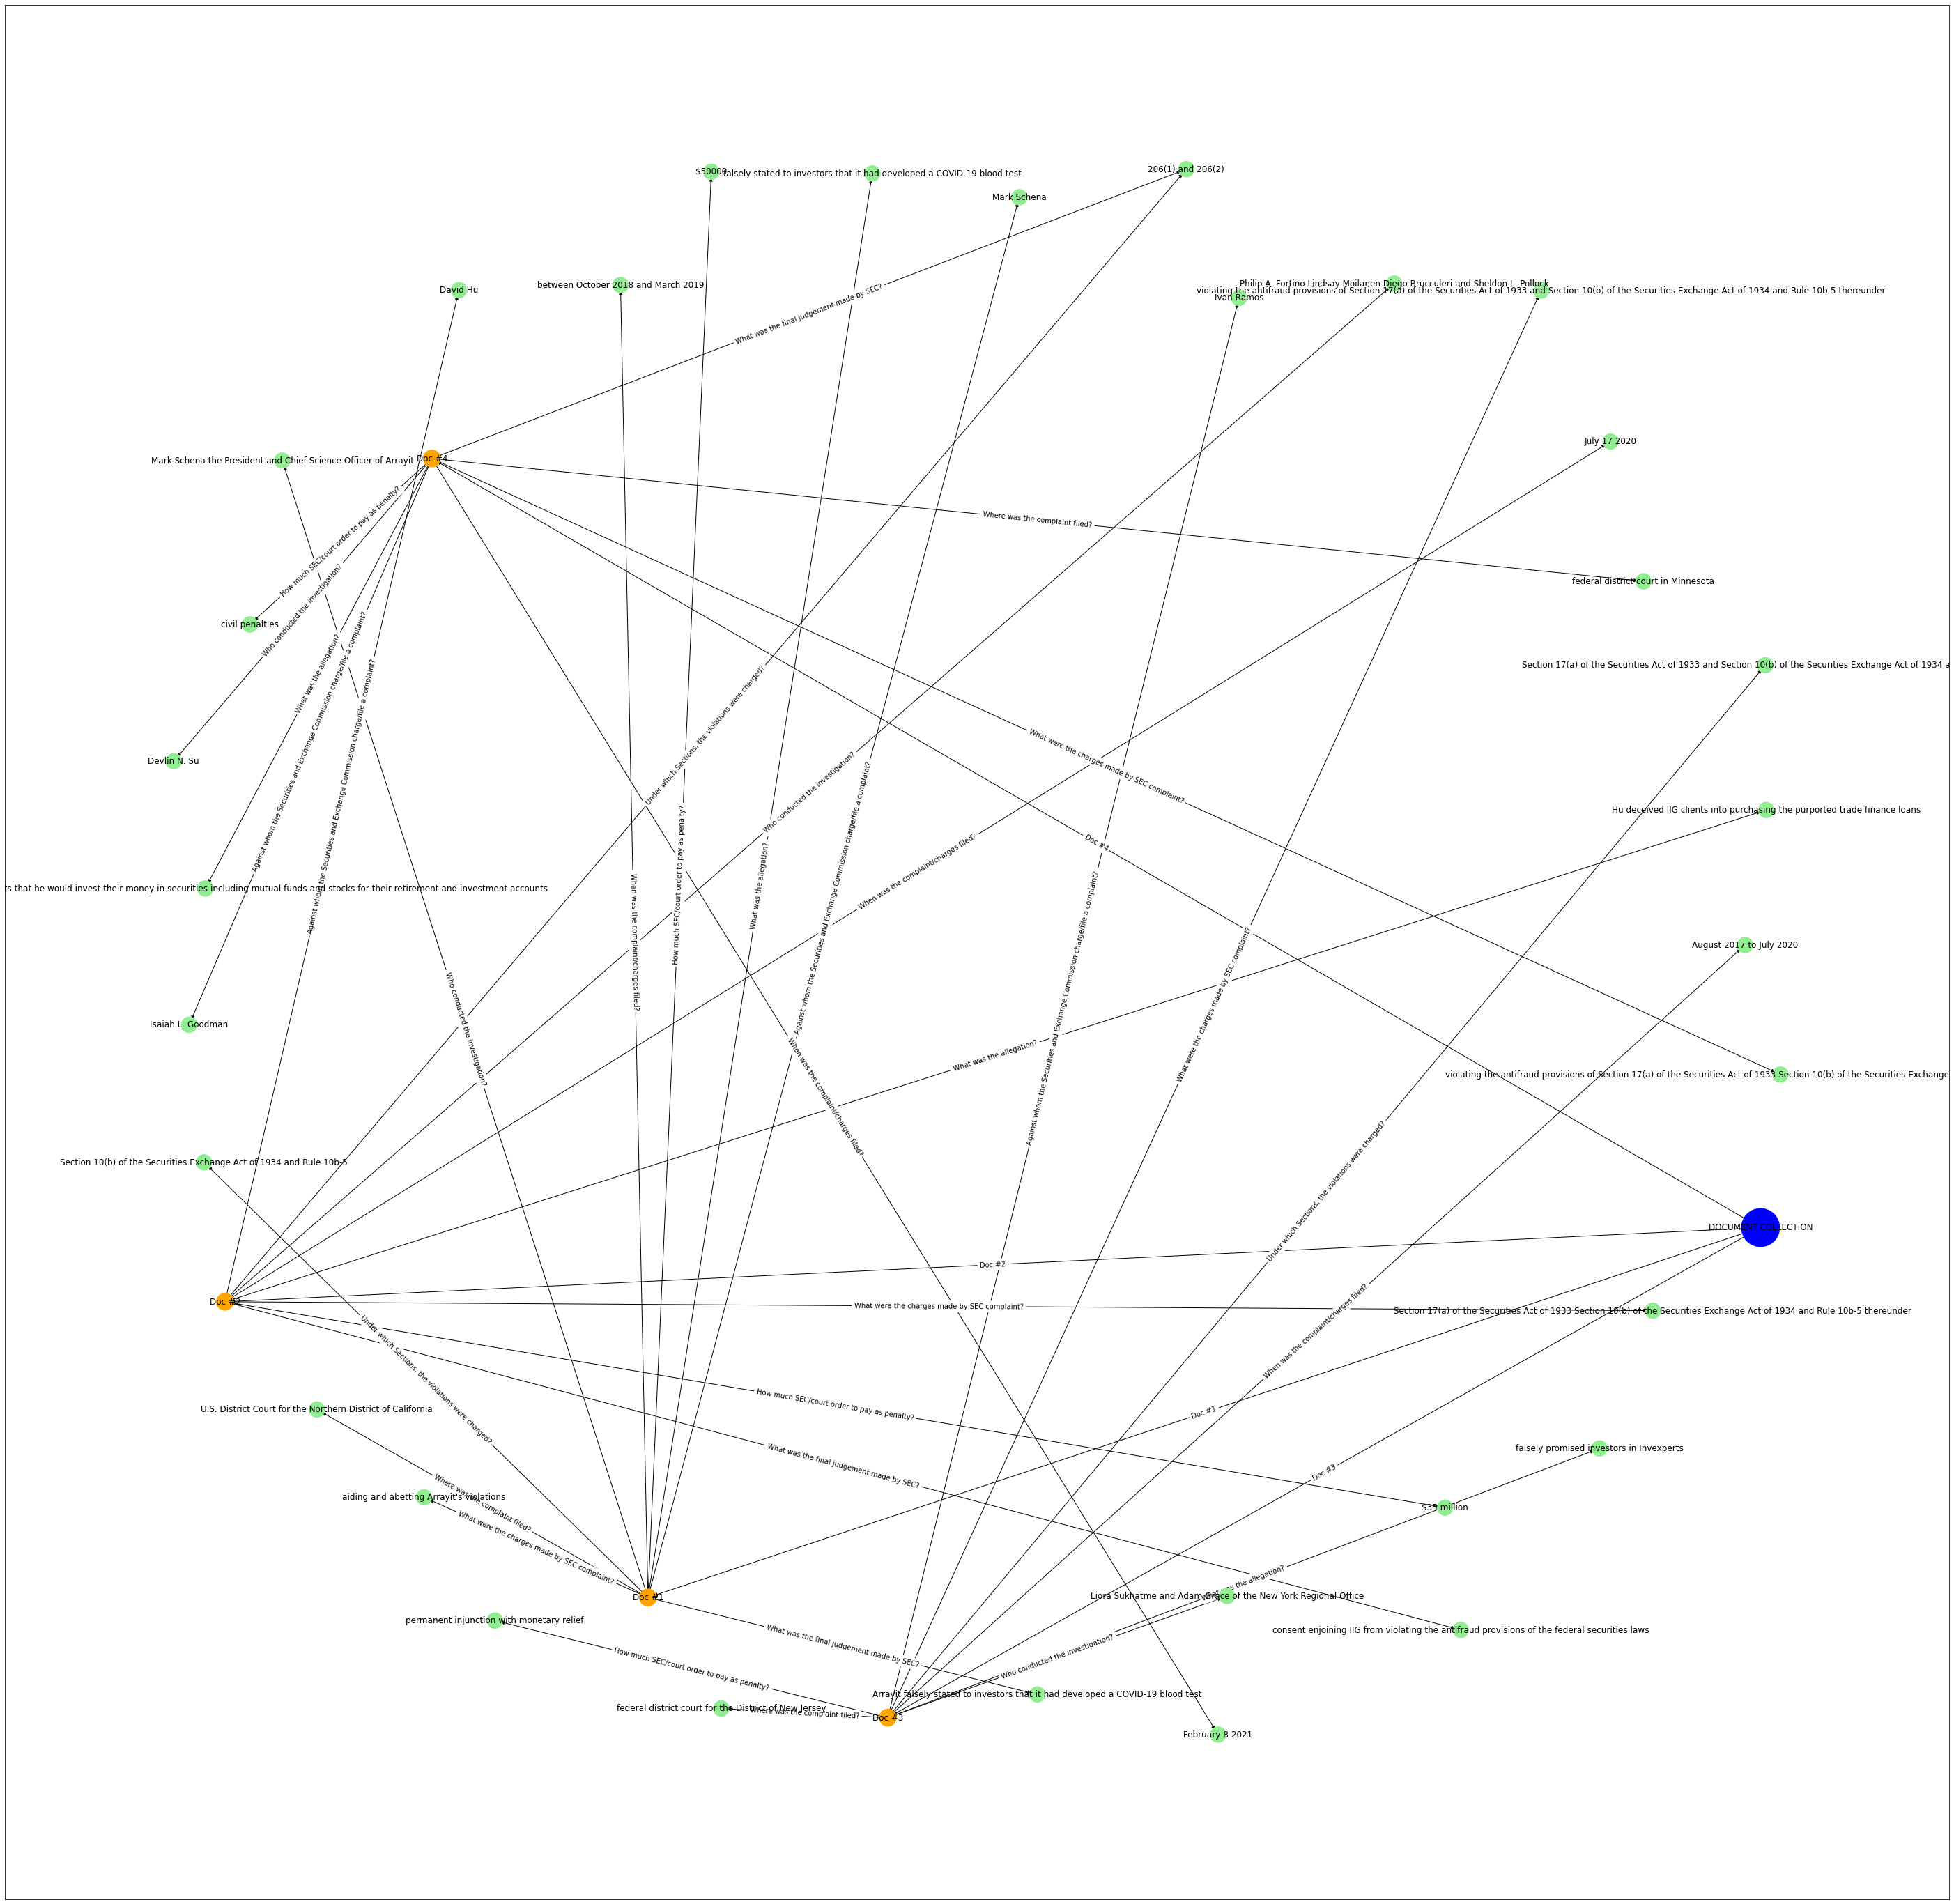

In [139]:
tree = False

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

node_list = []
size_list = []
color_map = []
# size_list.append(3000)
# color_map.append("blue")
G = nx.DiGraph()

doc_id_nodes = doc_id_nodes[:4]
for i in range(len(doc_id_nodes)):
  G.add_weighted_edges_from([(root_node,doc_id_nodes[i],i+1)])
  # size_list.append(600)
  # color_map.append("orange")
  for j in range(len(question_edges)):

    G.add_weighted_edges_from([(doc_id_nodes[i],answer_nodes[i*len(question_edges)+j],j+1)])
    # size_list.append(500)
    # color_map.append("green")

for node in G.nodes():
  if node==root_node:
    size_list.append(3000)
    color_map.append("blue")
  elif node.find("Doc #")!=-1:
    size_list.append(600)
    color_map.append("orange")
  else:
    size_list.append(500)
    color_map.append("lightgreen")    
    

# print(G.edges(data=True))

edge_labels=dict([((u,v,),question_edges[d['weight']-1]) if u!=root_node else ((u,v,),"Doc #" + str(d['weight']))  for u,v,d in G.edges(data=True)])

if tree==True:
  pos = hierarchy_pos(G,root_node,width=0.5,vert_gap=0.1)
else:
  pos = nx.spring_layout(G,k=100)
    
fig, ax = plt.subplots()
fig.set_size_inches(50, 50, forward=True)

# print(len(G.nodes), G.nodes)
# print(len(color_map),color_map)
# print(len(size_list),size_list)
nx.draw_networkx_nodes(G, pos, node_color=color_map, nodelist=G.nodes, node_size=size_list)

nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)

print(len(G.nodes))
print(len(edge_labels))
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()

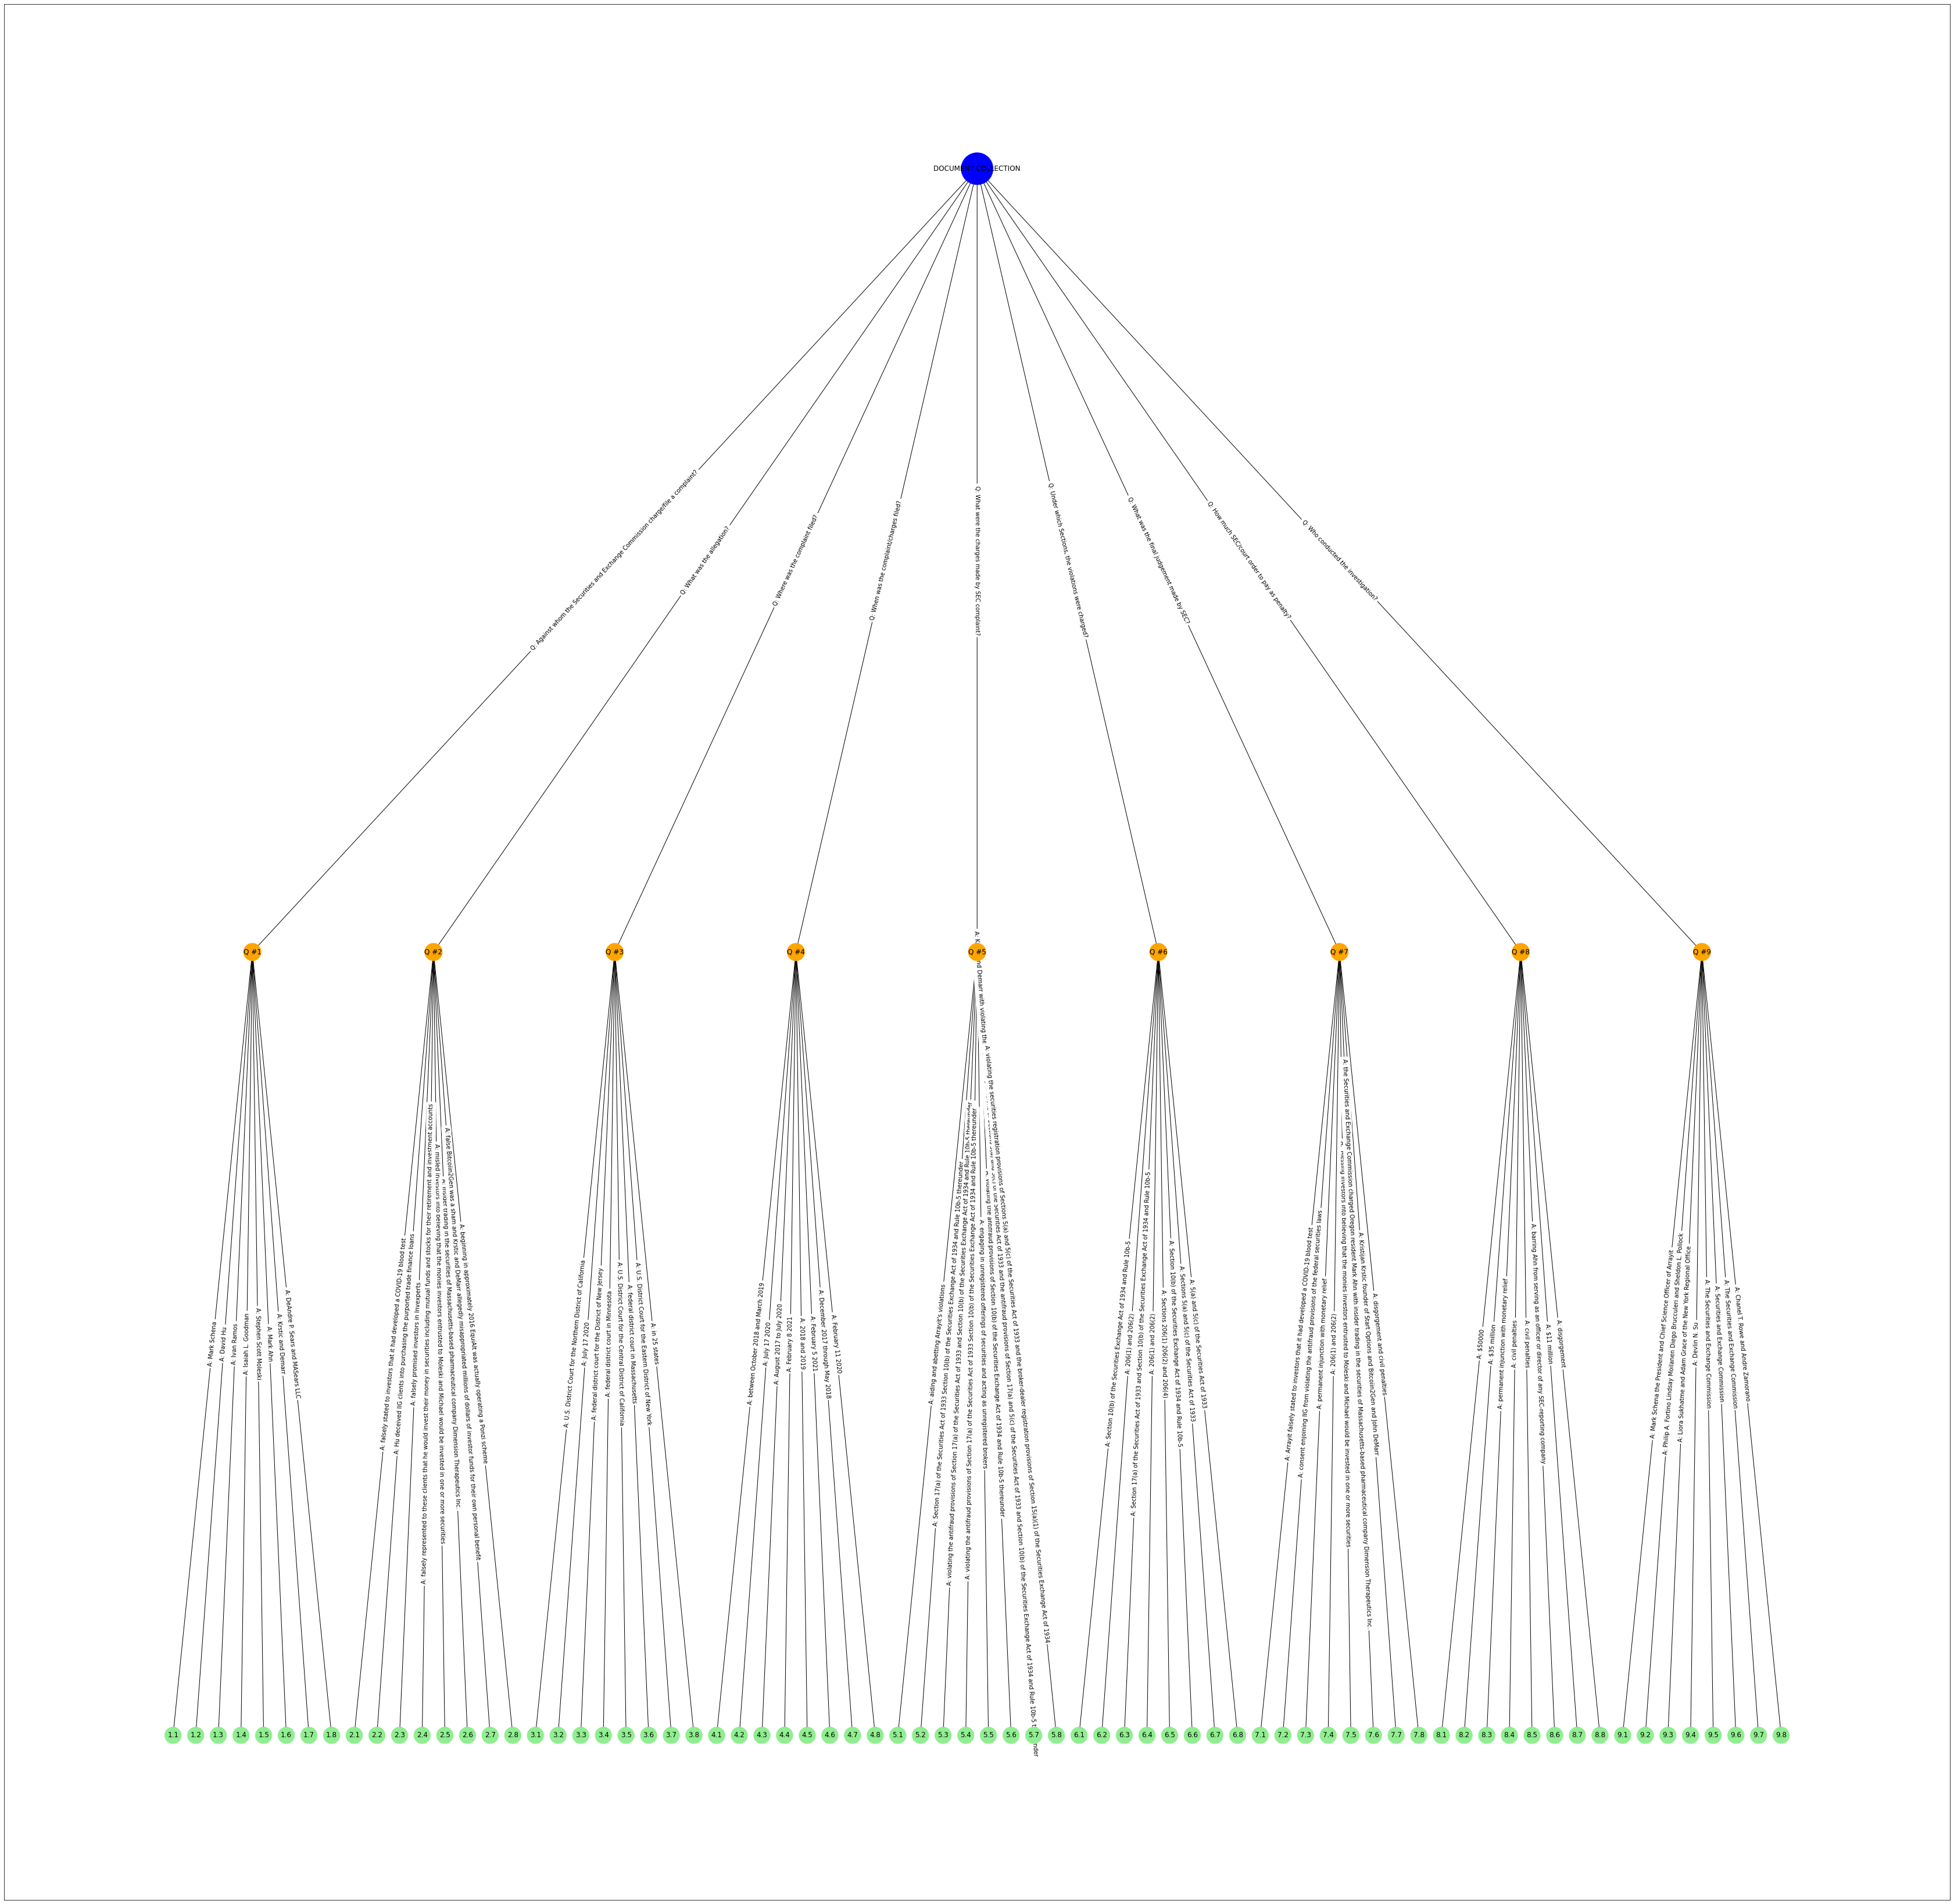

In [138]:
tree = True

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

node_list = []
size_list = []
color_map = []
# size_list.append(3000)
# color_map.append("blue")
G = nx.DiGraph()

# print(answer_nodes)
question_edges = general_questions
for i in range(len(question_edges)):

  G.add_weighted_edges_from([(root_node,"Q #" + str(i+1),i)])
  # size_list.append(600)
  # color_map.append("orange")
  for j in range(len(doc_id_nodes)):
    ind = i + j*len(question_edges)
    # print(i,ind)
    # answer_nodes[ind] = "Doc #" + str(j+1) + " Q #" + str(i+1) + " " +  answer_nodes[ind]
    G.add_weighted_edges_from([("Q #" + str(i+1), str(i+1) + "." + str(j+1) ,ind)])
    # size_list.append(500)
    # color_map.append("green")

for node in G.nodes():
  if node==root_node:
    size_list.append(3000)
    color_map.append("blue")
  elif node.find("Q #")!=-1:
    size_list.append(900)
    color_map.append("orange")
  else:
    size_list.append(800)
    color_map.append("lightgreen")    
    

# print(G.edges(data=True))

edge_labels=dict([((u,v,),"A: " + answer_nodes[d['weight']]) if u!=root_node else ((u,v,),"Q: " + question_edges[d['weight']])  for u,v,d in G.edges(data=True)])

if tree==True:
  pos = hierarchy_pos(G,root_node,width=20,vert_gap=1)
else:
  pos = nx.spring_layout(G,k=0.1,iterations=200)
    
fig, ax = plt.subplots()
fig.set_size_inches(60, 60, forward=True)

# print(len(G.nodes), G.nodes)
# print(len(color_map),color_map)
# print(len(size_list),size_list)
nx.draw_networkx_nodes(G, pos, node_color=color_map, nodelist=G.nodes, node_size=size_list)

nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)

# print(len(G.nodes))
# print(len(edge_labels))
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()

In [12]:
!pip install rdflib

     |████████████████████████████████| 235kB 15.8MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 


In [16]:
import rdflib
g = rdflib.Graph()
g.load("https://www.sec.gov/litigation/litreleases/2020/lr25003.htm")

for s, p, o in g:
    print(s, p, o)

TypeError: ignored

**FINETUNE QA**

In [ ]:
!pip install  transformers -U
!pip install datasets
!pip install tokenizers==0.9.4


Requirement already up-to-date: transformers in /usr/local/lib/python3.6/dist-packages (4.3.2)
     |████████████████████████████████| 2.9MB 11.2MB/s 
ERROR: transformers 4.3.2 has requirement tokenizers<0.11,>=0.10.1, but you'll have tokenizers 0.9.4 which is incompatible.
  Found existing installation: tokenizers 0.10.1
    Uninstalling tokenizers-0.10.1:
      Successfully uninstalled tokenizers-0.10.1


In [ ]:
%cd

/root


In [ ]:
import os
from os import path

if path.exists("/content/drive/MyDrive/querstion-answering/transformers")==False:
  %cp -r /content/drive/MyDrive/Finetune/transformers /content/drive/MyDrive/querstion-answering/transformers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/drive/MyDrive/querstion-answering/data.csv')

df[df.columns] = df.apply(lambda x: x.str.strip())

df["question"] = df["question"].apply(lambda x: "".join(x.splitlines()))
df["answer"] = df["answer"].apply(lambda x: "".join(x.splitlines()))
df["context"] = df["context"].apply(lambda x: "".join(x.splitlines()))


df_train, df_test = train_test_split(df, test_size=0.2)

df_train.to_csv("/content/drive/MyDrive/querstion-answering/data/train.csv")
print(len(df_train))

df_test.to_csv("/content/drive/MyDrive/querstion-answering/data/valid.csv")
print(len(df_test))



14
4
Index(['question', 'answer', 'context'], dtype='object')


In [ ]:
!python /content/drive/MyDrive/querstion-answering/run.py \
    --model_name_or_path t5-small \
    --train_file /content/drive/MyDrive/querstion-answering/data/train.csv \
    --validation_file /content/drive/MyDrive/querstion-answering/data/valid.csv \
    --output_dir /content/drive/MyDrive/querstion-answering/output \
    --overwrite_output_dir \
    --do_train \
    --do_eval \
    --per_device_train_batch_size=4 \
    --per_device_eval_batch_size=4 \


2021-02-12 09:54:29.013994: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
02/12/2021 09:54:32 - WARNING - __main__ -   Process rank: -1, device: cpu, n_gpu: 0distributed training: False, 16-bits training: False
02/12/2021 09:54:32 - INFO - __main__ -   Training/evaluation parameters TrainingArguments(output_dir=/content/drive/MyDrive/querstion-answering/output, overwrite_output_dir=True, do_train=True, do_eval=True, do_predict=False, evaluation_strategy=EvaluationStrategy.NO, prediction_loss_only=False, per_device_train_batch_size=4, per_device_eval_batch_size=4, gradient_accumulation_steps=1, eval_accumulation_steps=None, learning_rate=5e-05, weight_decay=0.0, adam_beta1=0.9, adam_beta2=0.999, adam_epsilon=1e-08, max_grad_norm=1.0, num_train_epochs=3.0, max_steps=-1, lr_scheduler_type=SchedulerType.LINEAR, warmup_steps=0, logging_dir=runs/Feb12_09-54-32_d94b39eb663e, logging_first_step=False, logging_steps=500, sa